In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler  
from scipy import stats
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.metrics import mean_squared_error
%matplotlib inline 
%matplotlib inline

In [2]:
df=pd.read_csv("data_regression.csv")

In [4]:
df.head()

,Rooms,Price,Distance,Bathroom,Car,Landsize,Lattitude,Longtitude,Propertycount,month,...,CouncilArea_Yarra City Council,CouncilArea_Yarra Ranges Shire Council,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,1480000.0,2.5,1,1,202.0,-37.7996,144.9984,4019.0,3,...,1,0,0,0,1,0,0,0,0,0
1,2,1035000.0,2.5,1,0,156.0,-37.8079,144.9934,4019.0,4,...,1,0,0,0,1,0,0,0,0,0
2,3,1465000.0,2.5,2,0,134.0,-37.8093,144.9944,4019.0,4,...,1,0,0,0,1,0,0,0,0,0
3,3,850000.0,2.5,2,1,94.0,-37.7969,144.9969,4019.0,4,...,1,0,0,0,1,0,0,0,0,0
4,4,1600000.0,2.5,1,2,120.0,-37.8072,144.9941,4019.0,4,...,1,0,0,0,1,0,0,0,0,0


In [22]:
y= df['Price']
X = df.drop(['Price'], axis = 1)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [24]:
alphas = np.logspace(-10, 2, 20)
alphas

array([  1.00000000e-10,   4.28133240e-10,   1.83298071e-09,
         7.84759970e-09,   3.35981829e-08,   1.43844989e-07,
         6.15848211e-07,   2.63665090e-06,   1.12883789e-05,
         4.83293024e-05,   2.06913808e-04,   8.85866790e-04,
         3.79269019e-03,   1.62377674e-02,   6.95192796e-02,
         2.97635144e-01,   1.27427499e+00,   5.45559478e+00,
         2.33572147e+01,   1.00000000e+02])

### Notice that in the coefficient plot that depending on the choice of tuning parameter, some of the coeffi-cients are exactly equal to zero. We now perform 10-fold cross-validation to choose the best alpha, refit the model, and compute the associated test error:

In [33]:
lasso = Lasso(alpha =23.357214690901213 )
lasso.fit(X_train, y_train)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
rmse = np.sqrt(mean_squared_error(y_test,lasso.predict(X_test)))
rmse

c:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


410516.14240877319

In [34]:
lassocv.alpha_

3.3572023587889057

In [28]:
# Some of the coefficients are now reduced to exactly zero.
pd.Series(lasso.coef_, index=X.columns)

Rooms                                         1.896956e+05
Distance                                     -3.556121e+04
Bathroom                                      1.551173e+05
Car                                           3.791569e+04
Landsize                                      1.004515e+01
Lattitude                                    -1.150307e+06
Longtitude                                   -1.078670e+05
Propertycount                                 4.255690e-01
month                                         5.900255e+02
Type_h                                        4.065594e+05
Type_t                                        1.256761e+05
Type_u                                       -7.062598e+04
Method_PI                                    -3.614847e+04
Method_S                                      3.351579e+04
Method_SA                                    -0.000000e+00
Method_SP                                     2.725260e+03
Method_VB                                    -6.520376e+

Learning Curve

In [30]:
from sklearn.model_selection import learning_curve
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer

In [35]:
from timeit import default_timer as timer

start = timer()
# import libraries
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge,RidgeCV
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, make_scorer
def MSE(y_true,y_pred):
    mse = mean_squared_error(y_true, y_pred)
    return mse

def two_score(y_true,y_pred):    
    score = MSE(y_true,y_pred) #set score here and not below if using MSE in GridCV
    #print (score)
    return score
def two_scorer():
    return make_scorer(two_score, greater_is_better=False) # change for false if using MSE

# steps
steps = [('lasso', Lasso())]

# Create the pipeline: pipeline
pipeline = Pipeline(steps)

# Specify the hyperparameter space
parameters = {'lasso__alpha':np.logspace(-10, 2, 20)}

# Create the GridSearchCV object: cv
cv = GridSearchCV(pipeline, parameters, cv=3, scoring= two_scorer())

# Fit to the training set
cv.fit(X_train, y_train)

#predict on train set
y_pred_train=cv.predict(X_train)

# Predict test set
y_pred_test=cv.predict(X_test)

# rmse on train set
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print("Root Mean Squared Error: {}".format(rmse))
end = timer()
print(end - start)

c:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

c:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
c:\anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with v

Root Mean Squared Error: 410573.62157380616
98.35102263379402


In [32]:
cv.best_params_

{'lasso__alpha': 23.357214690901213}

In [37]:
train_sizes = [1, 100, 500, 1000, 2500, 5000]
parameters = {'ridge__alpha':np.logspace(-10, 2, 20)}
train_sizes, train_scores, validation_scores = learning_curve(
                                                   estimator = Lasso(alpha = cv.best_params_['lasso__alpha']), X = X_train,
                                                   y = y_train, train_sizes = train_sizes, cv = 5,
                                                   scoring = 'neg_mean_squared_error')

C:\Users\Pranay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Pranay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Pranay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Pranay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to in

In [38]:
print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  -0.00000000e+00]
 [-1.01314085e+11 -4.86824849e+10 -4.86824849e+10 -4.86824849e+10
  -4.86824849e+10]
 [-1.24450422e+11 -1.08281714e+11 -1.08281714e+11 -1.08281714e+11
  -1.08281714e+11]
 [-1.66875194e+11 -1.13235764e+11 -1.13235764e+11 -1.13235764e+11
  -1.13235764e+11]
 [-1.70250168e+11 -1.29856967e+11 -1.29856967e+11 -1.29856967e+11
  -1.29856967e+11]
 [-1.57263894e+11 -1.36667272e+11 -1.56249536e+11 -1.56249536e+11
  -1.56249536e+11]]

 ----------------------------------------------------------------------

Validation scores:

 [[-3.90898637e+11 -4.26818009e+11 -4.32898934e+11 -4.05221701e+11
  -4.20805135e+11]
 [-3.02003292e+11 -2.75956919e+11 -2.54451061e+11 -3.02625928e+11
  -2.91671470e+11]
 [-1.58659288e+11 -1.87325726e+11 -1.75050920e+11 -1.62283730e+11
  -1.87717207e+11]
 [-1.50698287e+11 -1.77761895e+11 -1.67370283e+11 -1.54600853e+11
  -1.76398876e+11]
 [-1.46479938e+11 -1.73653989e+11 -

In [39]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1      -0.000000e+00
100     5.920880e+10
500     1.115155e+11
1000    1.239637e+11
2500    1.379356e+11
5000    1.525360e+11
dtype: float64

 --------------------

Mean validation scores

 1       4.153285e+11
100     2.853417e+11
500     1.742074e+11
1000    1.653660e+11
2500    1.610951e+11
5000    1.597996e+11
dtype: float64


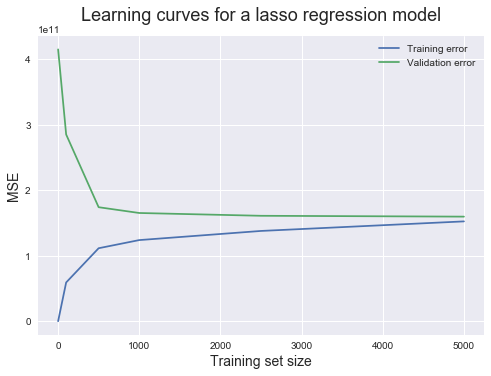

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')

plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a lasso regression model', fontsize = 18, y = 1.03)
plt.legend()

In [44]:
parameters = {'lasso__alpha':np.logspace(-10, 2, 20)}
alphas = parameters['lasso__alpha']

In [45]:
rmse_list = []
for alpha in alphas:

    cv = Lasso(alpha= alpha)
    # Fit to the training set
    cv.fit(X_train, y_train)
    #predict on train set
    y_pred_train=cv.predict(X_train)

    # Predict test set
    y_pred_test=cv.predict(X_test)

    # rmse on train set
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    rmse_list.append(rmse)
    #print("Root Mean Squared Error: {}".format(rmse))

C:\Users\Pranay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


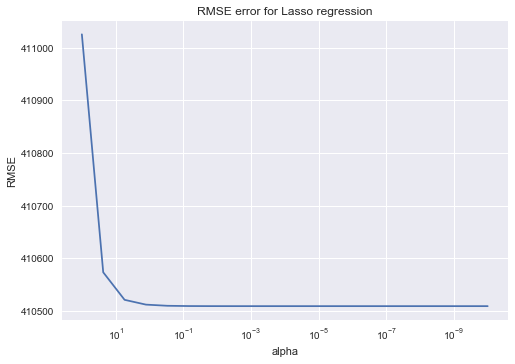

In [47]:
ax = plt.gca()

ax.plot(alphas, rmse_list)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('RMSE')
plt.title('RMSE error for Lasso regression')
plt.axis('tight')
plt.savefig('RMSE-alpha-Lasso.png')
plt.show()

C:\Users\Pranay\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


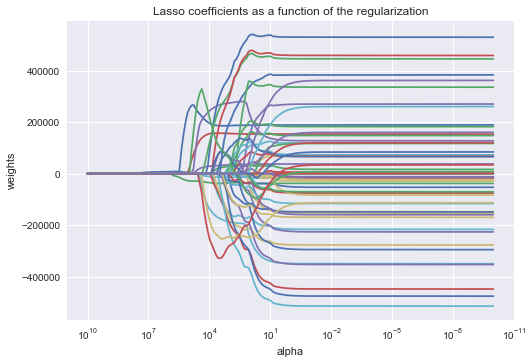

In [48]:
n_alphas = 200
alphas = np.logspace(-10, 10, n_alphas)

coefs = []
for a in alphas:
    lasso = Lasso(alpha=a, fit_intercept=False)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)

# #############################################################################
# Display results

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficients as a function of the regularization')
plt.axis('tight')
plt.show()